In [58]:
# Part 1
#Question 1 (6 points): Counting the frequencies in a list using dictionary in Python
#Given an unsorted list of some elements [2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3], 

#	Find the frequency of each distinct element in the list using a dictionary. 
#	Plot the frequency results, e.g. using bar chart. 
#	Store this dictionary results into json file.


In [102]:
import json

In [103]:
import pandas

In [104]:
import matplotlib.pyplot as plt

In [105]:
import numpy as np

In [106]:
array=sorted([2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3])
elements_count = {}
for element in array:
    if element in elements_count:
        elements_count[element] += 1
    else:
        elements_count[element] = 1
for key, value in elements_count.items():
    print(f"{key}: {value}")



0: 2
1: 3
2: 4
3: 5
4: 5
5: 2
6: 6
7: 4
8: 3
9: 5
10: 3


In [ ]:
# Two ways to store the dictionary into json file:

In [160]:
x = {0: 2, 1: 3, 2: 4, 3: 5, 4: 5, 5: 2, 6: 6, 7: 4, 8: 3, 9: 5, 10: 3}

In [161]:
y=json.dumps(x)

In [162]:
print (y)

{"0": 2, "1": 3, "2": 4, "3": 5, "4": 5, "5": 2, "6": 6, "7": 4, "8": 3, "9": 5, "10": 3}


In [ ]:
# OR (quicker and less coding)

In [107]:
print(json.dumps({0: 2, 1: 3, 2: 4, 3: 5, 4: 5, 5: 2, 6: 6, 7: 4, 8: 3, 9: 5, 10: 3}))
      

{"0": 2, "1": 3, "2": 4, "3": 5, "4": 5, "5": 2, "6": 6, "7": 4, "8": 3, "9": 5, "10": 3}


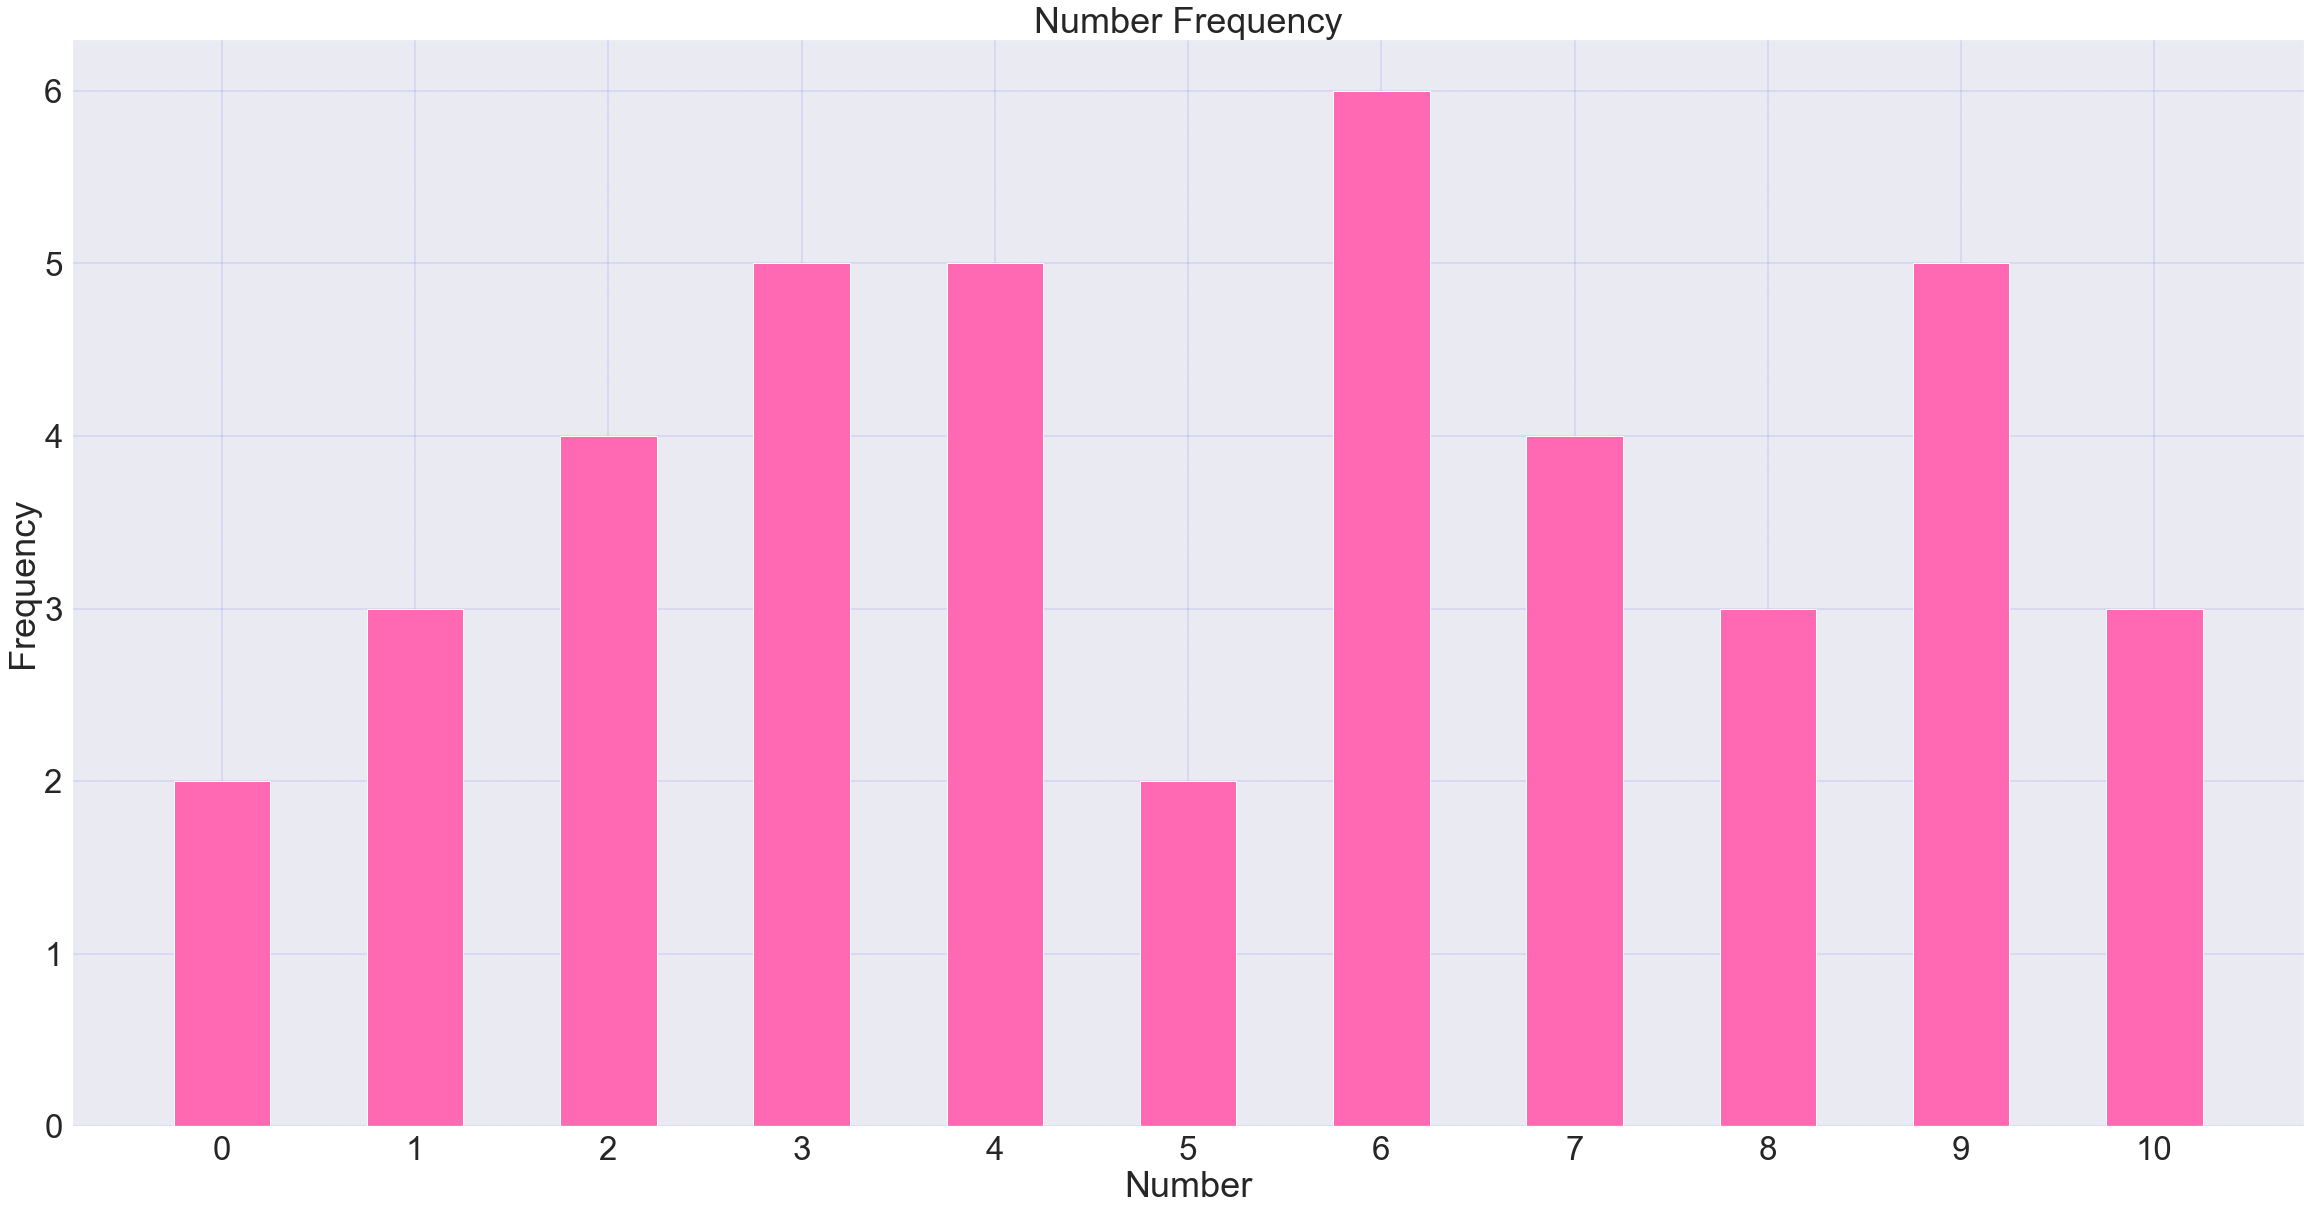

In [108]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([2,3,4,5,5,2,6,4,3,5,3])
plt.bar(x,y, width = .5, color = "hotpink")
plt.title("Number Frequency")
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.2)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.xticks(x)
plt.show()

In [ ]:
# Part 2

In [149]:
import pandas as pd

In [150]:
df = pd.read_json('/Users/ivyfortner/Desktop/your_posts_1.json')
df.head(3)

,timestamp,attachments,data,tags,title
0,2021-02-03 15:10:23,[],[{'update_timestamp': 1612365023}],NaN,NaN
1,2021-01-26 02:08:19,[],[{'update_timestamp': 1611626899}],NaN,NaN
2,2021-01-14 22:58:19,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'The glue that holds us all together...,[Dottie DeCesaris Fortner],NaN


In [151]:
df.rename(columns={'timestamp': 'date'}, inplace=True)

In [152]:
df = df.drop(['attachments', 'title', 'tags'], axis=1)

In [153]:
pd.to_datetime(df['date'])

df.head(3)

,date,data
0,2021-02-03 15:10:23,[{'update_timestamp': 1612365023}]
1,2021-01-26 02:08:19,[{'update_timestamp': 1611626899}]
2,2021-01-14 22:58:19,[{'post': 'The glue that holds us all together...


In [154]:
print(df.shape)
df.tail(3)

(712, 2)


,date,data
709,2012-02-10 23:38:00,[{'post': 'MAZZY! you better be coming down ne...
710,2012-02-10 23:34:02,[{'post': 'Happy birthday!'}]
711,2012-02-09 02:05:21,"[{'post': 'hacked by your sis, Kayleigh :) i l..."


In [155]:
df = df.set_index('date')
post_counts = df['data'].resample('MS').size()
post_counts

date
2012-02-01    34
2012-03-01     0
2012-04-01     0
2012-05-01     0
2012-06-01     0
              ..
2020-10-01     1
2020-11-01     0
2020-12-01     2
2021-01-01     3
2021-02-01     1
Freq: MS, Name: data, Length: 109, dtype: int64

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [157]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

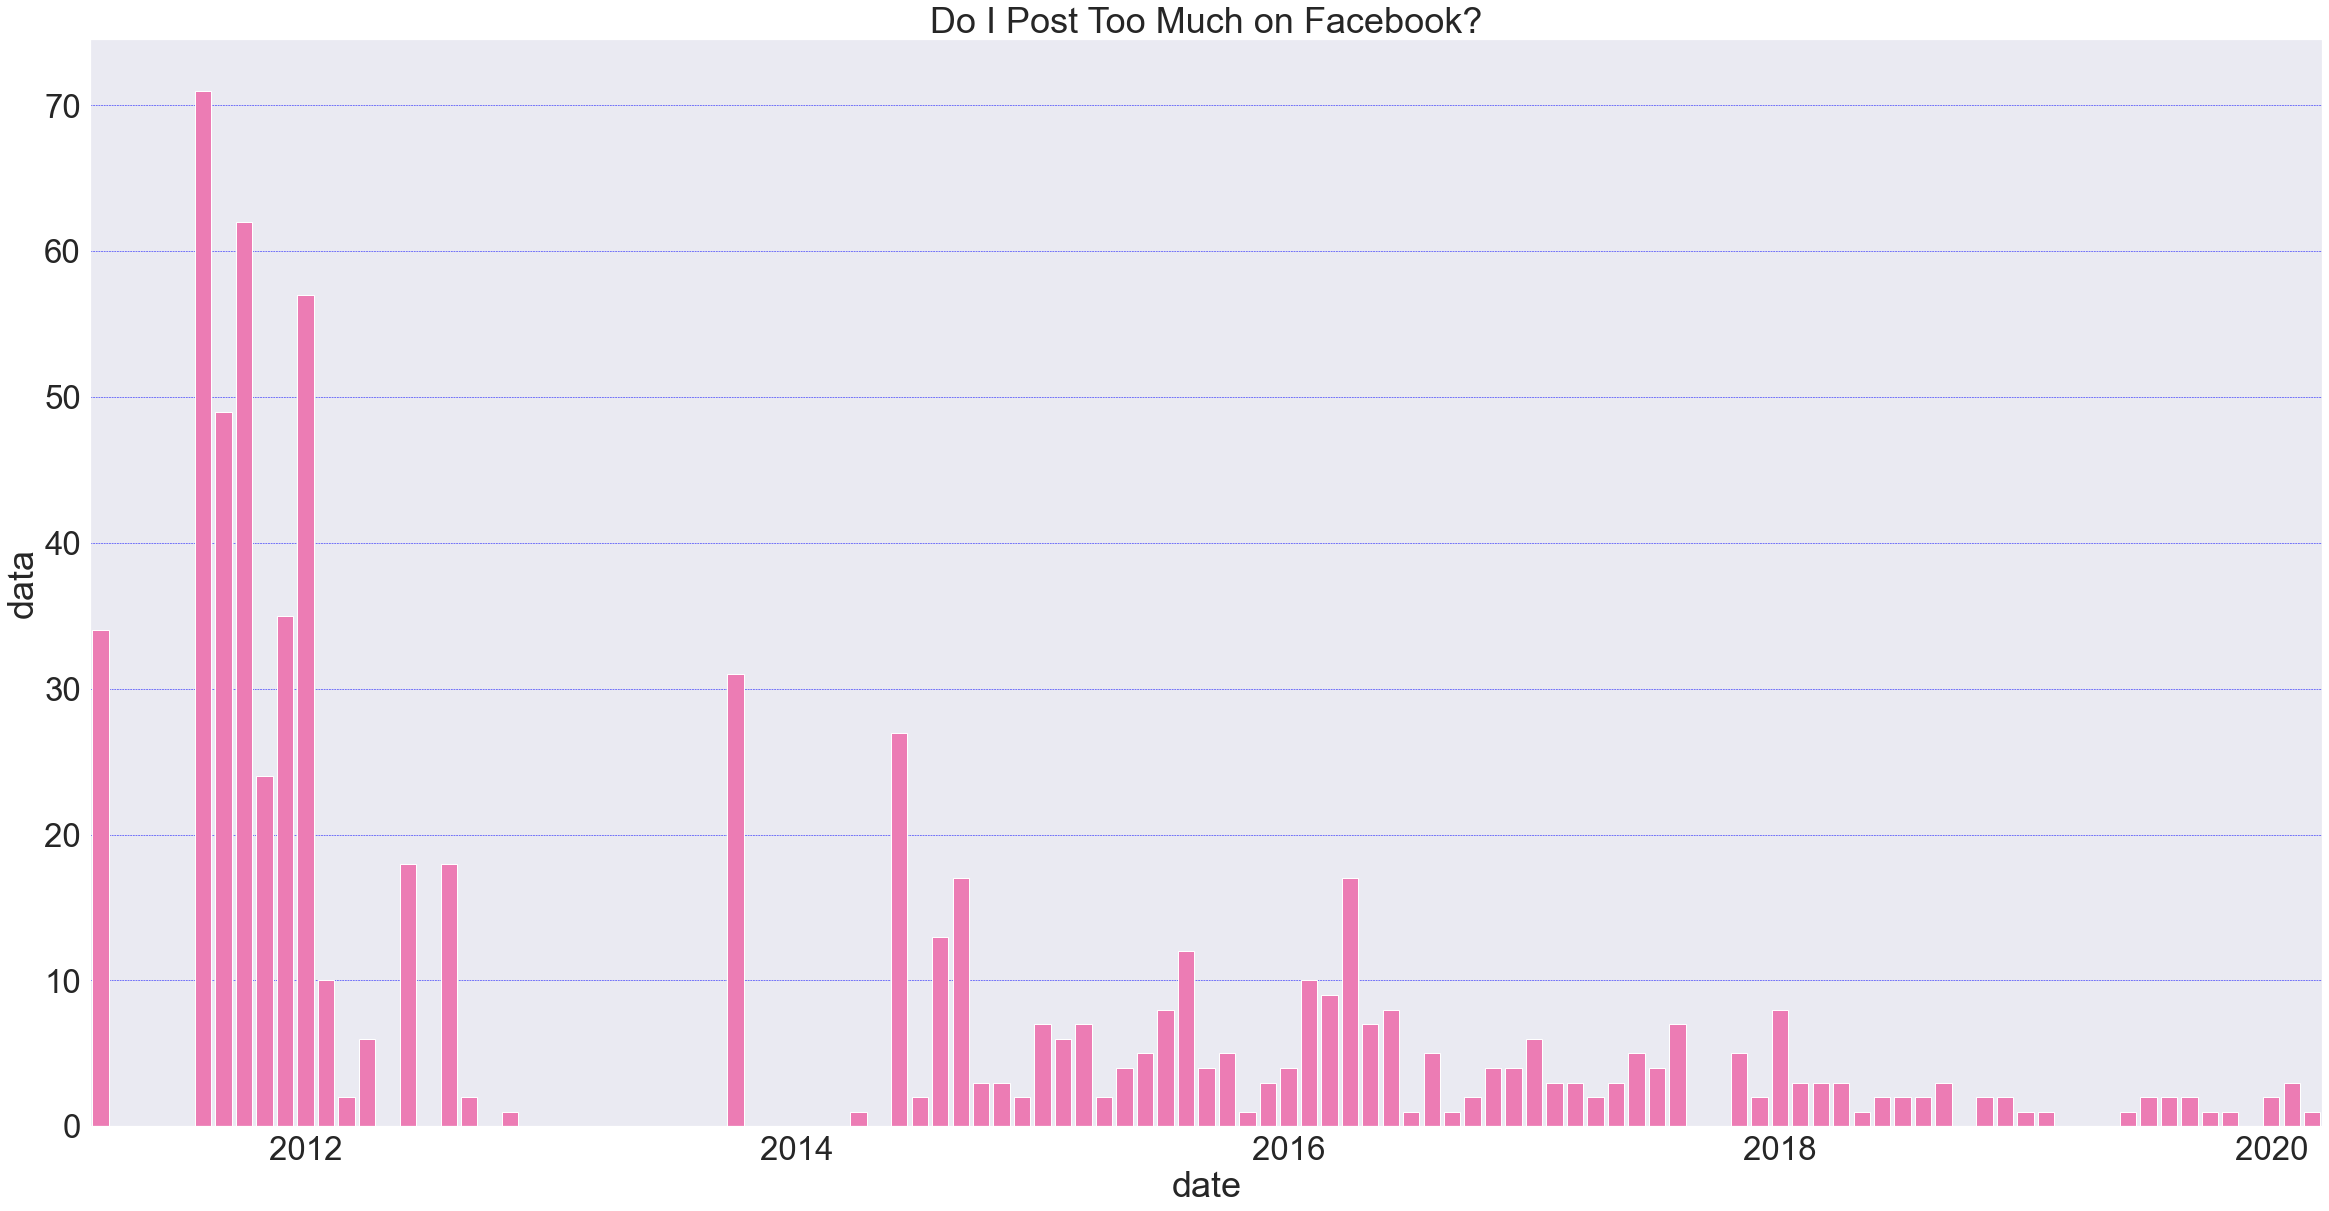

In [159]:
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)
x_labels = post_counts.index
plt.title("Do I Post Too Much on Facebook?")
sns.barplot(x_labels, post_counts, color="hotpink")
tick_positions = np.arange(10, len(x_labels), step=24)
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))
plt.show()